## Разведочный анализ данных – Exploratory Data Analysis (EDA)

Описание датасета:

- **studyName** --- название исследования
- **Sample Number** --- номер образца
- **Species** --- разновидность
- **Region** --- регион обитания
- **Island** --- остров обитания
- **Stage** --- стадия репродукции
- **Clutch Completion** --- наблюдалось гнездо с полной кладкой (2 яйца)
- **Date Egg** --- дата исследования гнезда (с 1 яйцом)
- **Culmen Length** --- длина верхней части клюва (мм)
- **Culmen Depth** --- глубина верхней части клюва (мм)
- **Flipper Length** --- длина ласт (мм)
- **Body Mass** --- масса тела (г)
- **Sex** (целевой признак) --- пол
- **Delta 15 N** --- изотопная сигнатура. Одно из применений δ15N в качестве трассировщика для определения пути, пройденного удобрениями.
- **Delta 13 С** ---  изотопная сигнатура. Массовые вымирания часто отмечаются отрицательными аномалиями δ13C, так как сопровождаются падением первичной продуктивности и высвобождением связанного в растениях углерода.
- **Comments** --- комментарий

Было бы интересно научится предсказывать целевой признак **Sex** (пол) по его нецелевым признакам.

Подключение библиотек

In [520]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем данные

In [521]:
df = pd.read_csv('/Users/sergioramos4/Downloads/penguins_lter.csv')

In [522]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Общее количество пропущенных значений

In [523]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Некоторые признаки имеют пропущенные значения, особенно **sex, Delta (15, 13)**. Будем это учитывать в дальнейшем при очистке данных. Признак **Comments** следует убрать, предварительно проверив на предмет полезной информации.

Посмотрим статистику по целевому признаку

In [524]:
df.groupby(['Sex', 'Species'])['Species'].count()

Sex     Species                                  
.       Gentoo penguin (Pygoscelis papua)             1
FEMALE  Adelie Penguin (Pygoscelis adeliae)          73
        Chinstrap penguin (Pygoscelis antarctica)    34
        Gentoo penguin (Pygoscelis papua)            58
MALE    Adelie Penguin (Pygoscelis adeliae)          73
        Chinstrap penguin (Pygoscelis antarctica)    34
        Gentoo penguin (Pygoscelis papua)            61
Name: Species, dtype: int64

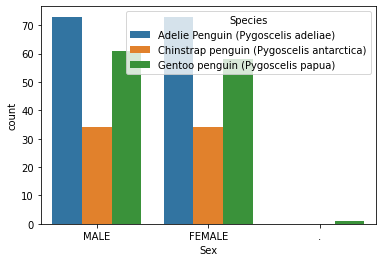

In [525]:
sns.countplot('Sex',hue='Species',data=df);

Практически идеальное равное распределение признака. Замечено некорректное заполнение - подумать, как исправить.

## Первичный анализ признаков

### Категориальный признак Species

In [529]:
df['Species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: Species, dtype: int64

In [530]:
df['Species'].replace(['Adelie Penguin (Pygoscelis adeliae)',
                       'Gentoo penguin (Pygoscelis papua)',
                      'Chinstrap penguin (Pygoscelis antarctica)'], ['Adelie', 'Gentoo', 'Chinstrap'], inplace=True)

<Axes: xlabel='Species', ylabel='count'>

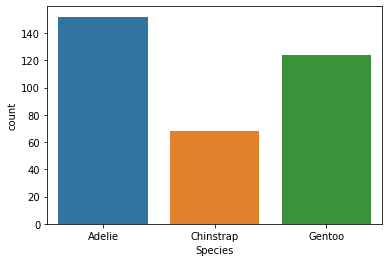

In [531]:
sns.countplot('Species', data=df)

Рассматриваются 3 разновидности пингвинов, причем Chinstrap встречается в 2 раза реже остальных.

### Категориальный признак Region

In [532]:
df.groupby(['Region', 'Species'])['Species'].count()

Region  Species  
Anvers  Adelie       152
        Chinstrap     68
        Gentoo       124
Name: Species, dtype: int64

In [533]:
df['Region'].value_counts()

Anvers    344
Name: Region, dtype: int64

Рассматривается только один регион проживания - **Anvers**, поэтому данный признак не влияет на положение дел и учитываться не будет.

### Категориальный признак Island

In [534]:
df.groupby(['Island', 'Species'])['Species'].count()

Island     Species  
Biscoe     Adelie        44
           Gentoo       124
Dream      Adelie        56
           Chinstrap     68
Torgersen  Adelie        52
Name: Species, dtype: int64

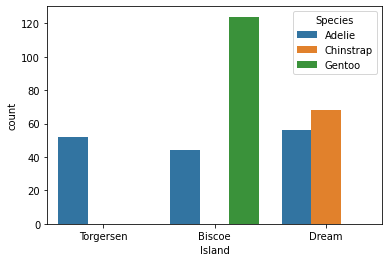

In [535]:
sns.countplot('Island',hue='Species',data=df);

**Adelie** встречаются на всех островах, причем достаточно равномерно, чего не скажешь про **Chinstrap и Gentoo**. Таким образом, данный признак будет очень сильно влиять на модель.

### Порядковый признак Stage

In [536]:
df.groupby(['Stage', 'Species'])['Species'].count()

Stage               Species  
Adult, 1 Egg Stage  Adelie       152
                    Chinstrap     68
                    Gentoo       124
Name: Species, dtype: int64

In [537]:
df['Stage'].value_counts()

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

Рассматриваются только взрослые особи с одинаковой стадией репродукции, способные отложить 1 яйцо. Данный признак не влияет на положение дел и учитываться не будет.

### Категориальный бинарный признак Clutch Completion

In [538]:
df['Clutch Completion'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [539]:
df['Clutch Completion'].mean()

0.8953488372093024

В 90% случаев наблюдалась полная кладка гнезда

In [540]:
pd.crosstab(df['Species'], df['Clutch Completion'], margins=True).style.background_gradient()

Clutch Completion,0,1,All
Species,,,
Adelie,14,138,152
Chinstrap,14,54,68
Gentoo,8,116,124
All,36,308,344


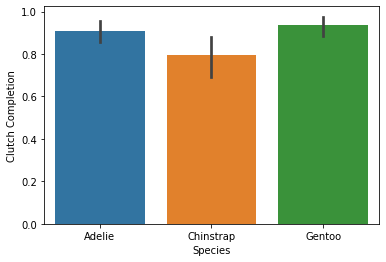

In [541]:
sns.barplot(x = "Species", y = "Clutch Completion", data = df);

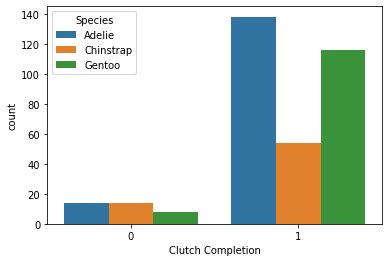

In [542]:
sns.countplot('Clutch Completion',hue='Species',data=df);

Пингвины **Chinstrap** значительно реже своих сорожичей осуществляют полную кладку гнезда. Возможно, отчасти с этим связана их низкая численность. 

In [543]:
pd.crosstab([df['Sex'], df['Clutch Completion']], df['Species'], margins=True).style.background_gradient()

Данная таблица хорошо иллюстрирует способность пингвинов образовывать пары, поэтому предположим, что некорректное значение пола есть самец пингвина, у которого не наблюдалось полной кладки гнезда. P.S. по антропометрическим признакам, визуализированным violinplot'ом достоверно определить пол невозможно. 

In [544]:
df['Sex'].replace(['.'], ['MALE'], inplace=True)

### Порядковый признак Date Egg

In [545]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'],format= '%m/%d/%y')

In [546]:
df['Date Egg'].dt.month.value_counts()

11    330
12     14
Name: Date Egg, dtype: int64

Пингвины откладывают яйца в ноябре, изредка в начале декабря, поэтому интересно рассмотреть статистику по годам. 

In [547]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'],format= '%m/%d/%y').dt.year

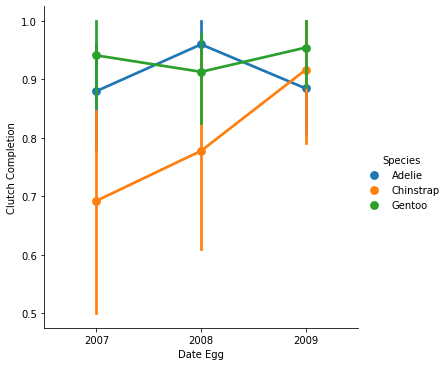

In [548]:
sns.factorplot('Date Egg', 'Clutch Completion', hue='Species', data=df);

В процессе наблюдения у пингвинов **Chinstrap** сложилась положительная динамика в окладке полного гнезда.

### Количественные признаки Culmen Length и Depth

In [549]:
df['Culmen Length (mm)'].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: Culmen Length (mm), dtype: float64

In [550]:
df['Culmen Depth (mm)'].describe()

count    342.000000
mean      17.151170
std        1.974793
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: Culmen Depth (mm), dtype: float64

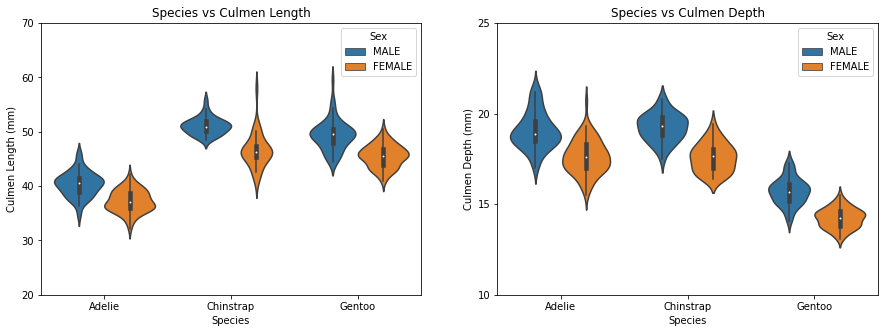

In [551]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("Species", "Culmen Length (mm)", hue="Sex", data=df, ax=ax[0])
ax[0].set_title('Species vs Culmen Length')
ax[0].set_yticks(range(20, 80, 10))
sns.violinplot("Species", "Culmen Depth (mm)", hue="Sex", data=df, ax=ax[1])
ax[1].set_title('Species vs Culmen Depth')
ax[1].set_yticks(range(10, 30, 5))
plt.show()

### Количественные признаки Flipper Length и Body Mass

In [552]:
df['Flipper Length (mm)'].describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64

In [553]:
df['Body Mass (g)'].describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: Body Mass (g), dtype: float64

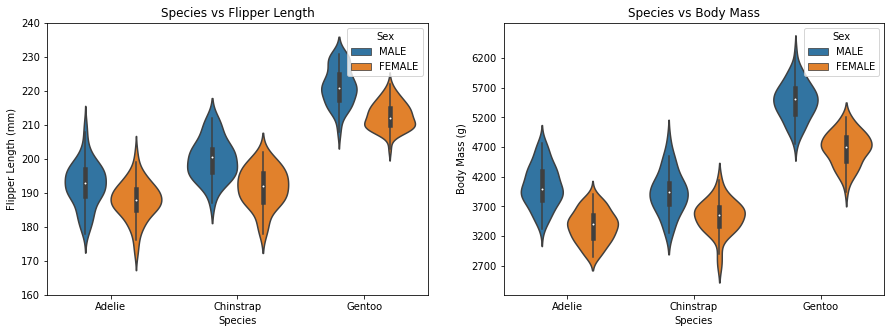

In [554]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.violinplot("Species", "Flipper Length (mm)", hue="Sex", data=df, ax=ax[0])
ax[0].set_title('Species vs Flipper Length')
ax[0].set_yticks(range(160, 250, 10))
sns.violinplot("Species", "Body Mass (g)", hue="Sex", data=df, ax=ax[1])
ax[1].set_title('Species vs Body Mass')
ax[1].set_yticks(range(2700, 6300, 500))
plt.show()

Стоит обратить внимание на превосходящую антропометрию и более тонкий клюв пингвинов **Gentoo**.

### Количественные признаки Delta 15 N и Delta 13 C

In [555]:
df['Delta 15 N (o/oo)'].describe()

count    330.000000
mean       8.733382
std        0.551770
min        7.632200
25%        8.299890
50%        8.652405
75%        9.172123
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64

In [556]:
df['Delta 13 C (o/oo)'].describe()

count    331.000000
mean     -25.686292
std        0.793961
min      -27.018540
25%      -26.320305
50%      -25.833520
75%      -25.062050
max      -23.787670
Name: Delta 13 C (o/oo), dtype: float64

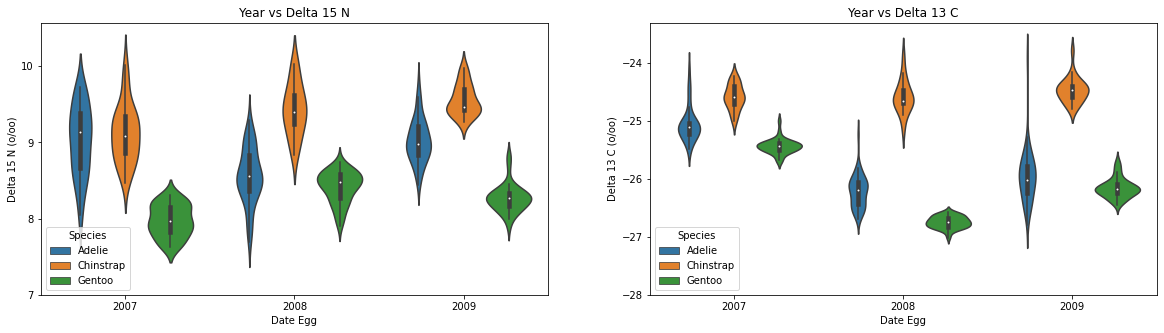

In [557]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.violinplot("Date Egg", "Delta 15 N (o/oo)", hue="Species", data=df, ax=ax[0])
ax[0].set_title('Year vs Delta 15 N')
ax[0].set_yticks(range(7, 11, 1))
sns.violinplot("Date Egg", "Delta 13 C (o/oo)", hue="Species", data=df, ax=ax[1])
ax[1].set_title('Year vs Delta 13 C')
ax[1].set_yticks(range(-28, -23, 1))
plt.show()

За 3 года наблюдений, нельзя сказать, о существенном влиянии **Delta 15 N** на пингвинов. При этом **Delta 13 C** оказал серьезный эффект на некоторые виды.

## Feature Engineering and Data Cleaning

In [558]:
df[df['Delta 15 N (o/oo)'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,1,2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,1,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
8,PAL0708,9,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,1,2007,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
11,PAL0708,12,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,1,2007,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
12,PAL0708,13,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,1,2007,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
13,PAL0708,14,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,1,2007,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Not enough blood for isotopes.
15,PAL0708,16,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N8A2,1,2007,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
39,PAL0708,40,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N25A2,0,2007,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,Nest never observed with full clutch. Not enou...
41,PAL0708,42,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N26A2,1,2007,40.8,18.4,195.0,3900.0,MALE,NaN,NaN,Not enough blood for isotopes.
46,PAL0708,47,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N29A1,1,2007,41.1,19.0,182.0,3425.0,MALE,NaN,NaN,Not enough blood for isotopes.


In [559]:
adelieMale = df.loc[(df['Species'] == 'Adelie') & (df['Sex'] == 'MALE')]
adelieFemale = df.loc[(df['Species'] == 'Adelie') & (df['Sex'] == 'FEMALE')]
chinstrapMale = df.loc[(df['Species'] == 'Chinstrap') & (df['Sex'] == 'MALE')]
gentooMale = df.loc[(df['Species'] == 'Gentoo') & (df['Sex'] == 'MALE')]

In [560]:
df.loc[(df['Delta 15 N (o/oo)'].isnull()) &
       (df['Sex'] == 'MALE') &
       (df['Species'] == 'Adelie'), 'Delta 15 N (o/oo)'] = adelieMale['Delta 15 N (o/oo)'].mean()

df.loc[(df['Delta 15 N (o/oo)'].isnull()) &
       (df['Sex'] == 'FEMALE') &
       (df['Species'] == 'Adelie'), 'Delta 15 N (o/oo)'] = adelieFemale['Delta 15 N (o/oo)'].mean()

df.loc[(df['Delta 15 N (o/oo)'].isnull()) &
       (df['Sex'] == 'MALE') &
       (df['Species'] == 'Chinstrap'), 'Delta 15 N (o/oo)'] = chinstrapMale['Delta 15 N (o/oo)'].mean()

df.loc[(df['Delta 15 N (o/oo)'].isnull()) &
       (df['Sex'] == 'MALE') &
       (df['Species'] == 'Gentoo'), 'Delta 15 N (o/oo)'] = gentooMale['Delta 15 N (o/oo)'].mean()

Замена признака **Delta 15 N** усредненным значением относительно разновидности и пола

In [561]:
df[df['Delta 13 C (o/oo)'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,1,2007,39.1,18.7,181.0,3750.0,MALE,8.928437,NaN,Not enough blood for isotopes.
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,1,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
8,PAL0708,9,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,1,2007,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
11,PAL0708,12,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,1,2007,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
12,PAL0708,13,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N7A1,1,2007,41.1,17.6,182.0,3200.0,FEMALE,8.793275,NaN,Not enough blood for isotopes.
13,PAL0708,14,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N7A2,1,2007,38.6,21.2,191.0,3800.0,MALE,8.928437,NaN,Not enough blood for isotopes.
15,PAL0708,16,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N8A2,1,2007,36.6,17.8,185.0,3700.0,FEMALE,8.793275,NaN,Not enough blood for isotopes.
39,PAL0708,40,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N25A2,0,2007,39.8,19.1,184.0,4650.0,MALE,8.928437,NaN,Nest never observed with full clutch. Not enou...
41,PAL0708,42,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N26A2,1,2007,40.8,18.4,195.0,3900.0,MALE,8.928437,NaN,Not enough blood for isotopes.
46,PAL0708,47,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N29A1,1,2007,41.1,19.0,182.0,3425.0,MALE,8.928437,NaN,Not enough blood for isotopes.


In [562]:
df.loc[(df['Delta 13 C (o/oo)'].isnull()) &
       (df['Sex'] == 'MALE') &
       (df['Species'] == 'Adelie'), 'Delta 13 C (o/oo)'] = adelieMale['Delta 13 C (o/oo)'].mean()

df.loc[(df['Delta 13 C (o/oo)'].isnull()) &
       (df['Sex'] == 'FEMALE') &
       (df['Species'] == 'Adelie'), 'Delta 13 C (o/oo)'] = adelieFemale['Delta 13 C (o/oo)'].mean()

df.loc[(df['Delta 13 C (o/oo)'].isnull()) &
       (df['Sex'] == 'MALE') &
       (df['Species'] == 'Gentoo'), 'Delta 13 C (o/oo)'] = gentooMale['Delta 13 C (o/oo)'].mean()

Замена признака **Delta 13 C** усредненным значением относительно разновидности и пола

In [563]:
df[df['Sex'].isna()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,1,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
8,PAL0708,9,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,1,2007,34.1,18.1,193.0,3475.0,NaN,NaN,NaN,No blood sample obtained.
9,PAL0708,10,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,1,2007,42.0,20.2,190.0,4250.0,NaN,9.13362,-25.09368,No blood sample obtained for sexing.
10,PAL0708,11,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,1,2007,37.8,17.1,186.0,3300.0,NaN,8.63243,-25.21315,No blood sample obtained for sexing.
11,PAL0708,12,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N6A2,1,2007,37.8,17.3,180.0,3700.0,NaN,NaN,NaN,No blood sample obtained.
47,PAL0708,48,Adelie,Anvers,Dream,"Adult, 1 Egg Stage",N29A2,1,2007,37.5,18.9,179.0,2975.0,NaN,NaN,NaN,Sexing primers did not amplify. Not enough blo...
246,PAL0708,27,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,1,2007,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
286,PAL0809,67,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N51A1,1,2008,46.2,14.4,214.0,4650.0,NaN,8.24253,-26.81540,NaN
324,PAL0910,105,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N24A1,1,2009,47.3,13.8,216.0,4725.0,NaN,8.25818,-26.23886,NaN
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Записи **N2A2 и N38A2** совсем неинформативные. Ничего не остается - убираем.

In [564]:
df.drop(df.loc[df['Individual ID']=='N2A2'].index, inplace=True)
df.drop(df.loc[df['Individual ID']=='N38A2'].index, inplace=True)

In [565]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      8
Delta 15 N (o/oo)        3
Delta 13 C (o/oo)        3
Comments               314
dtype: int64

Стало заметно лучше, хотя на данный момент неочевидно, чем заполнить оставшиеся пропущенные значения

### Удаление ненужных признаков

In [566]:
df.drop(['Sample Number', 'studyName', 'Region', 'Stage', 'Comments', 'Individual ID'], axis=1, inplace=True)

### Трансформация строк в числа

In [567]:
df['Sex'].replace(['MALE', 'FEMALE'], [0, 1], inplace=True)
df['Species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2], inplace=True)
df['Island'].replace(['Torgersen', 'Dream', 'Biscoe'], [0, 1, 2], inplace=True)

### Корреляция признаков

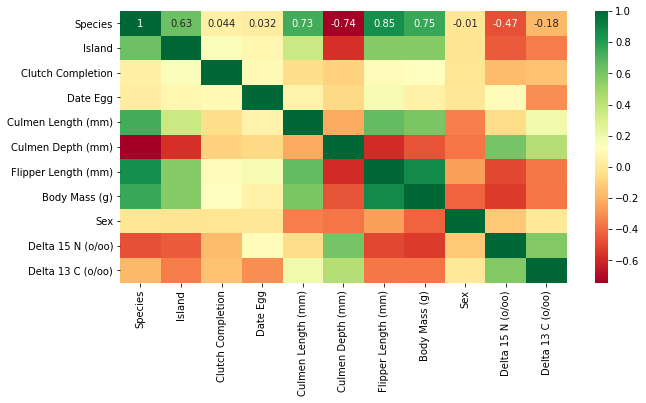

In [568]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Как и ожидалось, многие признаки сильно зависят друг от друга. Отталкиваясь от целевого признака, совершенно точно можно не учитывать **Species**. Также разумно исключить некоторые антропометрические признаки, как сильно связанные между собой.

In [569]:
df.drop(['Species', 'Culmen Depth (mm)', 'Body Mass (g)', 'Flipper Length (mm)'], axis=1, inplace=True)

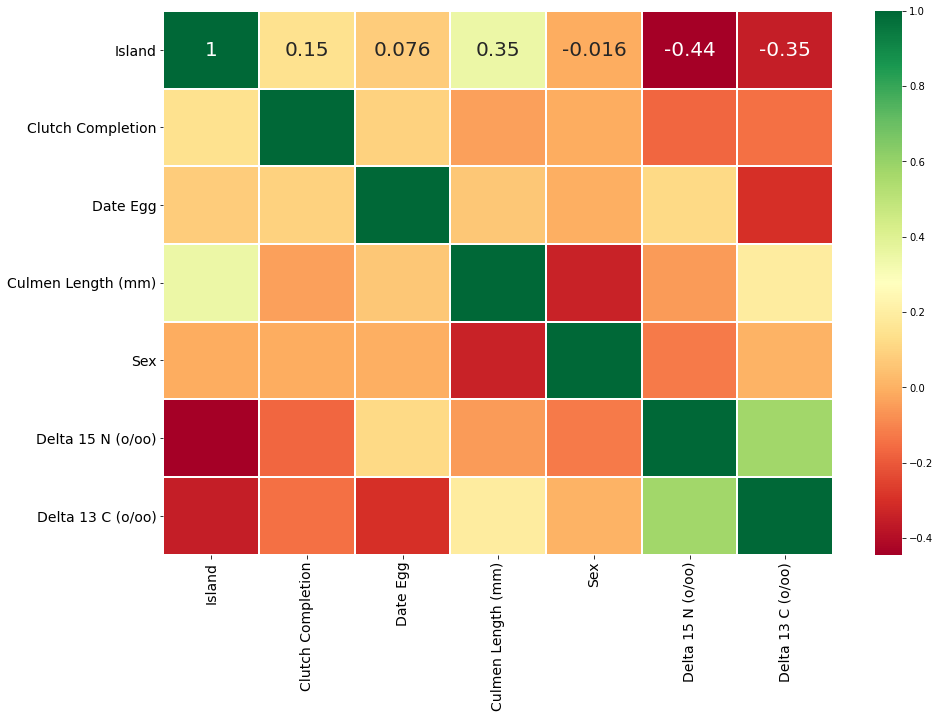

In [571]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Спасибо за внимание!